In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,explained_variance_score
from sklearn import datasets
from sklearn.utils import shuffle
from utils import plot_feature_importance

In [4]:
#getting locally downloaded csv file
fileRoute = "./Files/"
californiaRoute =fileRoute+ os.listdir(fileRoute)[1]
californiaRoute
california_DF = pd.read_csv(californiaRoute)
california_DF.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [5]:
california_DF.query('a==33.57')

UndefinedVariableError: name 'a' is not defined

In [3]:
california_DF.head()
input_features = np.array(california_DF.loc[:,:california_DF.columns[len(california_DF.columns)-2]])
output_features = np.array(california_DF.loc[:,california_DF.columns[len(california_DF.columns)-1]:])/1000
features_names =np.array(california_DF.columns)

In [4]:
x,y =shuffle(input_features,output_features,random_state=7)

training_quantity = int(0.7 * len(x))
x_train, y_train= x[training_quantity:],y[training_quantity:]
x_test,y_test   = x[:training_quantity],y[:training_quantity]

dt_regress = DecisionTreeRegressor(max_depth=4)
dt_regress.fit(x_train,y_train)

ab_regress = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=400,random_state=7)
ab_regress.fit(x_train,y_train)

y_ab_pred = ab_regress.predict(x_test)
y_dt_pred = dt_regress.predict(x_test)

mse_dt = mean_squared_error(y_test,y_dt_pred)
evar_dt = explained_variance_score(y_test,y_dt_pred)
print("DT:The mean squared error of ds is {} and the explained variance is {}".format(round(mse_dt,2),round(evar_dt,2)))

mse_dt = mean_squared_error(y_test,y_ab_pred)
evar_dt = explained_variance_score(y_test,y_ab_pred)
print("AB:The mean squared error of ds is {} and the explained variance is {}".format(round(mse_dt,2),round(evar_dt,2)))

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


DT:The mean squared error of ds is 6366.97 and the explained variance is 0.53
AB:The mean squared error of ds is 7700.05 and the explained variance is 0.58


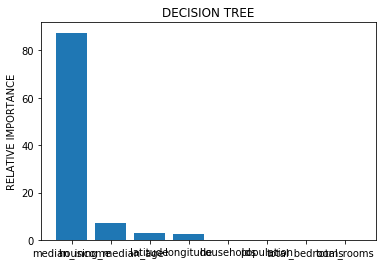

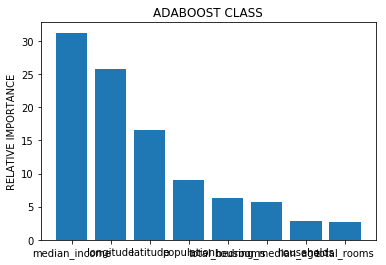

In [5]:
plot_feature_importance(dt_regress.feature_importances_,"DECISION TREE",features_names)
plot_feature_importance(ab_regress.feature_importances_,"ADABOOST CLASS",features_names)